<a href="https://colab.research.google.com/github/abhipise2704/Machine_learning-/blob/master/Assignment_12_MNIST_KERAS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 12 
## Keras -- MLPs on MNIST
## abhipise2704@gmail.com_12

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Dynamic Plot Function on Every Epoch For Validation Loss & Training Loss

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax,model_number, colors=['b']):
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    ax.set_xlabel('epoch',fontsize=14) 
    ax.set_ylabel('Categorical Crossentropy Loss',fontsize=14)
    model_nu=model_number
    plt.title("Validation Loss & Training Loss of  {}".format(model_nu),fontsize=18)
    plt.legend()
    plt.grid()
    

## 2. Loading Data From Keras inbuilt Dataset

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h1>3. MODEL 1 WITH 2 HIDDEN LAYERS</h1>
`https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76'

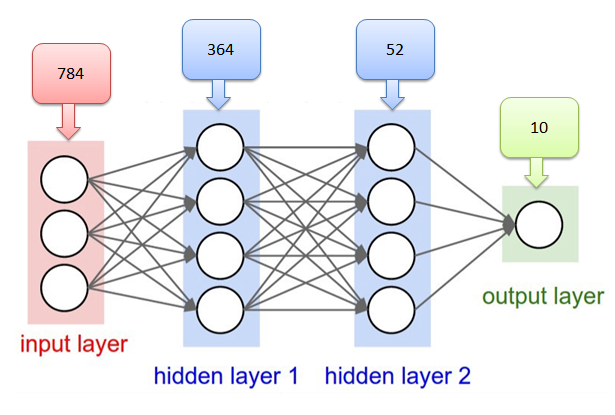

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## 3.1 MODEL_1 GENERATION WITH KERAS 

In [0]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(364, activation='relu', input_shape=(input_dim,)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(52, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 52)                18980     
_________________________________________________________________
batch_normalization_2 (Batch (None, 52)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## 3.2 MODEL_1 COMPILATION 

In [0]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 1.0605 - accuracy: 0.6647 - val_loss: 0.4118 - val_accuracy: 0.8980
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.6008 - accuracy: 0.8186 - val_loss: 0.2926 - val_accuracy: 0.9190
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.4942 - accuracy: 0.8535 - val_loss: 0.2503 - val_accuracy: 0.9278
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.4378 - accuracy: 0.8688 - val_loss: 0.2218 - val_accuracy: 0.9353
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3927 - accuracy: 0.8847 - val_loss: 0.2026 - val_accuracy: 0.9400
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.3677 - accuracy: 0.8926 - val_loss: 0.1866 - val_accuracy: 0.9440
Epoch 7/20
60000/60000 [==============================] - 2s 34us/st

## 3.4 GRAPH OF VALIDATION AND TRAINING LOSS of Model_1

Test score: 0.10692012182269245
Test accuracy: 0.9674999713897705


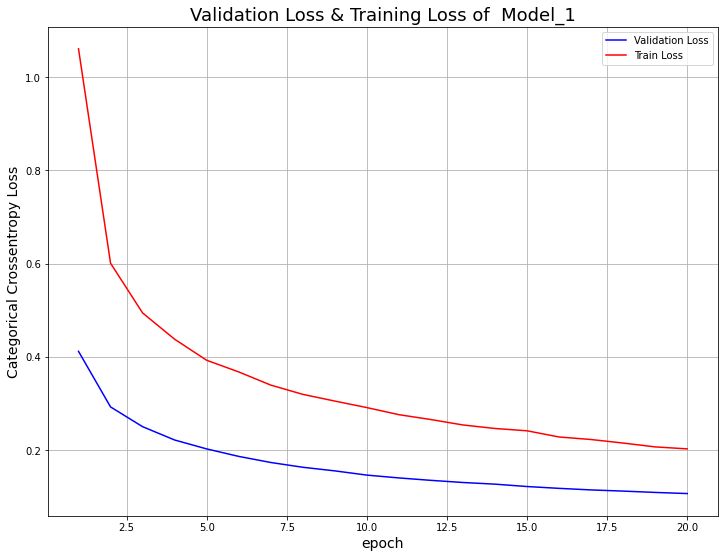

In [0]:
%matplotlib inline

score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


#fig,ax = plt.subplots(1,1)


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax,'Model_1')

## 3.5 ViolinPlot Weights in Different Layers 

<Figure size 432x288 with 0 Axes>

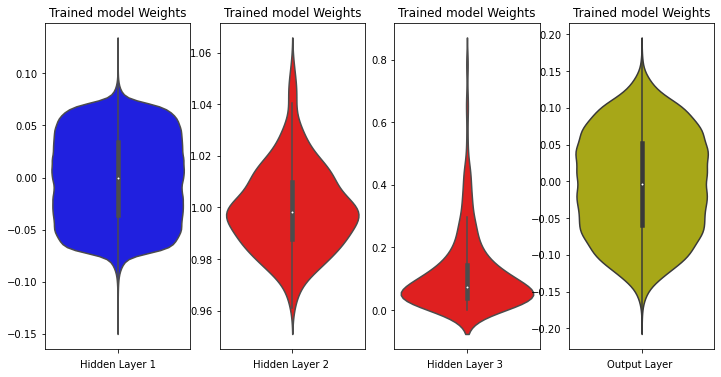

In [0]:
%matplotlib inline


w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.figure(figsize=(12,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3.6 Confusion Matrix Model_1

confusion Matrix= 
 [[ 966    1    1    1    1    2    5    1    1    1]
 [   0 1120    3    2    0    1    4    2    3    0]
 [   6    1  988    6    6    0    2    9   14    0]
 [   0    0    8  981    1    5    0    7    8    0]
 [   2    0    4    1  949    0    5    2    3   16]
 [   4    1    1   15    1  848    9    2    7    4]
 [   6    3    0    0    8    6  930    0    5    0]
 [   1    6   12    3    0    0    0  992    1   13]
 [   3    0    1    9    5    3    3    5  943    2]
 [   4    6    1   10   13    0    1    6   10  958]]


Text(114.0, 0.5, 'True Label')

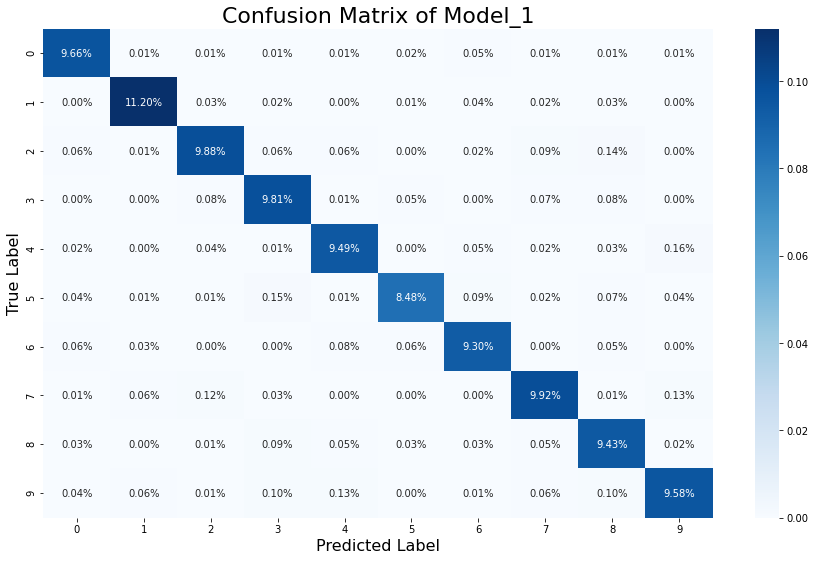

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

rounded_predictions = model_1.predict_classes(X_test, batch_size=128, verbose=0)
rounded_predictions[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
print("confusion Matrix= \n",cm)

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns

plt.figure(figsize=(15,9))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.title('Confusion Matrix of Model_1',fontsize=22)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)



---



---





---



---



 <h1>  4. MODEL 2 WITH 3 HIDDEN LAYERS </h1>

 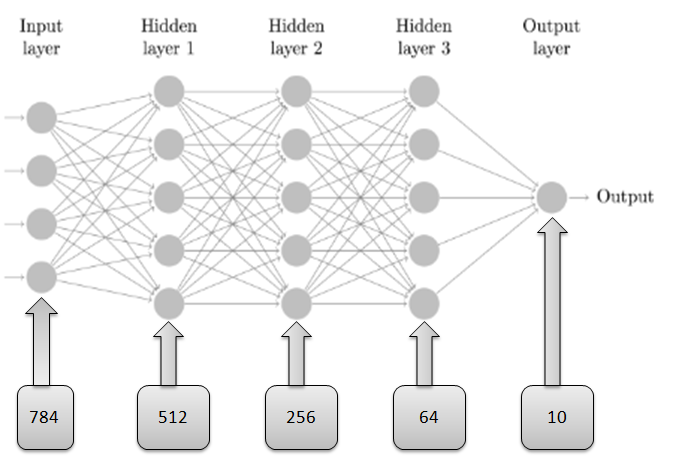

'Image Reference::https://www.cs.swarthmore.edu/~meeden/cs63/s19/labs/07.html'

## 4.1 Model Building of 3 Layers 

In [0]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_2 = Sequential()

model_2.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(64, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

## 4.2 Model Compilation  

In [0]:
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.2457 - accuracy: 0.6087 - val_loss: 0.3861 - val_accuracy: 0.9024
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.6447 - accuracy: 0.8021 - val_loss: 0.2773 - val_accuracy: 0.9194
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.5207 - accuracy: 0.8430 - val_loss: 0.2394 - val_accuracy: 0.9310
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.4582 - accuracy: 0.8641 - val_loss: 0.2147 - val_accuracy: 0.9375
Epoch 5/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.4099 - accuracy: 0.8809 - val_loss: 0.1949 - val_accuracy: 0.9414
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3767 - accuracy: 0.8901 - val_loss: 0.1814 - val_accuracy: 0.9457
Epoch 7/20
60000/60000 [==============================] - 2s 41us/st

## 4.3 Model_2 Loss plot of Training & Validation 

Test score: 0.10528058233680204
Test accuracy: 0.9682999849319458


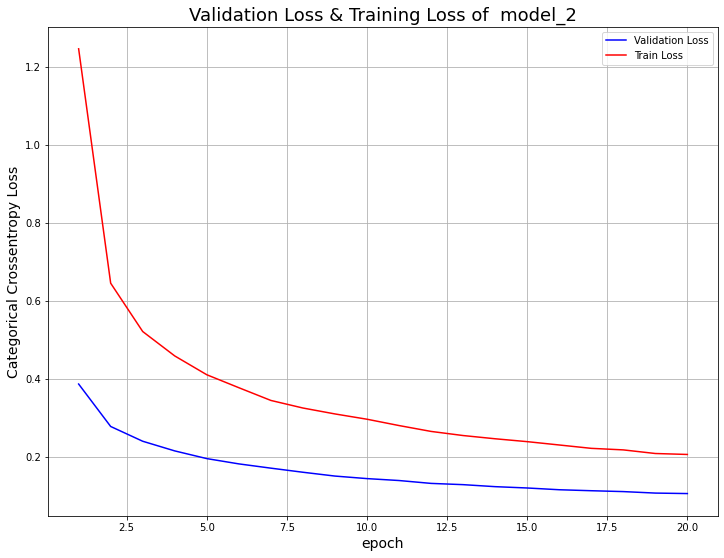

In [0]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax,'model_2')

## 4.4 Violin Plot of weights of Different Layers

<Figure size 432x288 with 0 Axes>

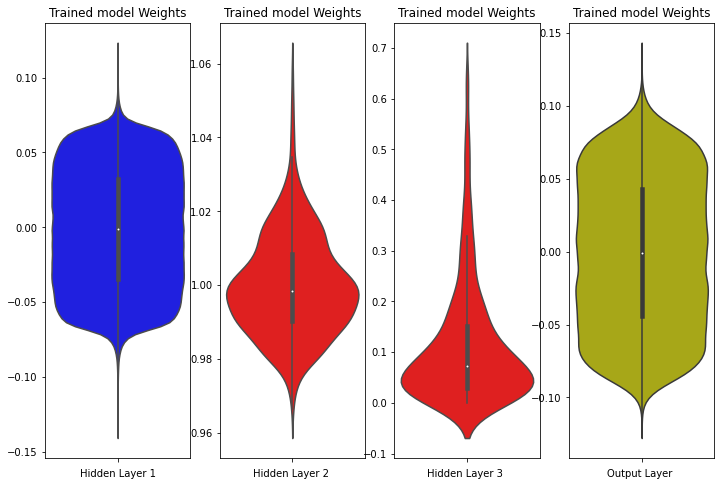

In [0]:
%matplotlib inline

w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4.5 Confusion Matrix of Model 2

confusion Matrix= 
 [[ 969    0    1    0    1    2    4    1    2    0]
 [   0 1121    3    2    0    1    2    0    6    0]
 [   9    2  992    8    3    0    2    9    6    1]
 [   1    0    6  977    1    9    0    7    8    1]
 [   1    1    3    0  944    0    7    1    2   23]
 [   4    1    0    7    1  858    8    1    7    5]
 [   9    3    0    1    6    4  931    0    4    0]
 [   1    8   14    3    0    0    0  990    1   11]
 [   5    0    2    8    4    2    5    4  942    2]
 [   3    5    1    7   14    3    1    6   10  959]]


Text(114.0, 0.5, 'True Label')

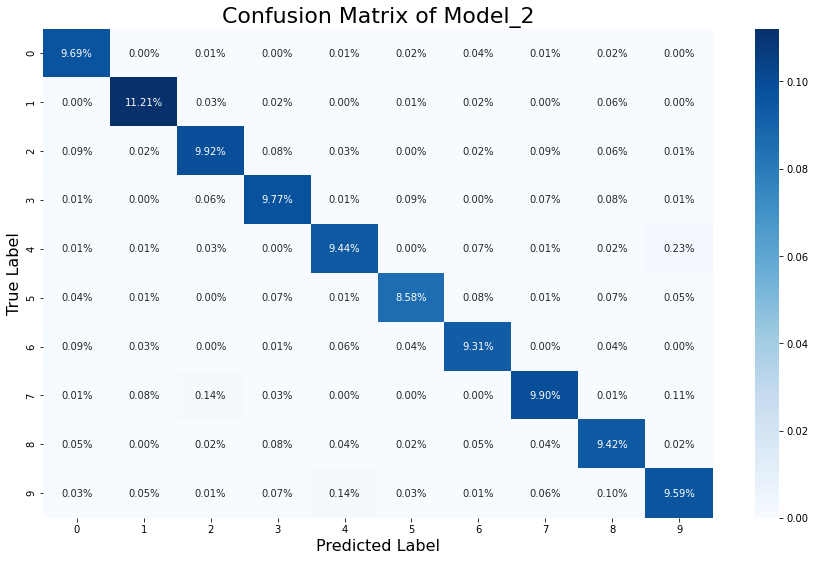

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

rounded_predictions = model_2.predict_classes(X_test, batch_size=128, verbose=0)
rounded_predictions[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
print("confusion Matrix= \n",cm)

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns

plt.figure(figsize=(15,9))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.title('Confusion Matrix of Model_2',fontsize=22)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)



---



---



---



<h1> 5. MODEL 3 WITH 5 HIDDEN LAYERS  </h1>

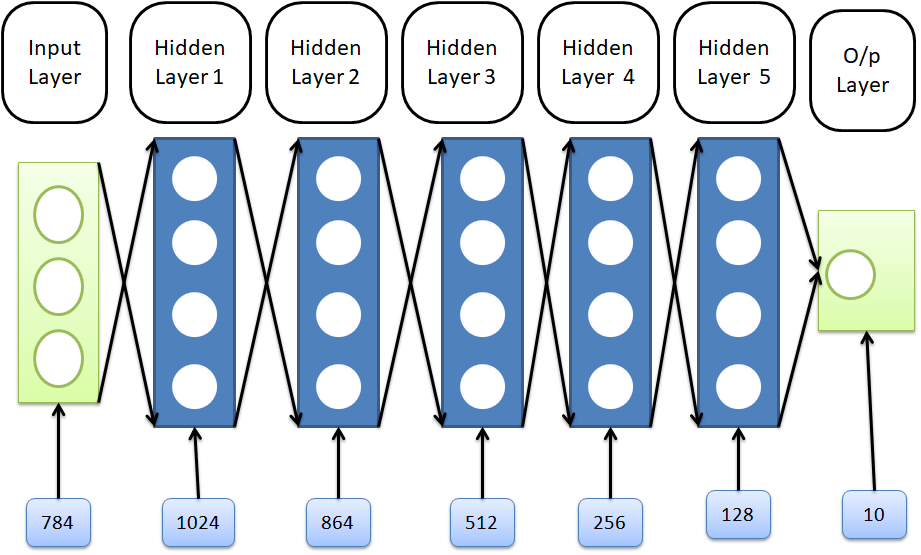

## 5.1 Model_3 Creation 

In [0]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_3 = Sequential()

model_3.add(Dense(1024, activation='relu', input_shape=(input_dim,)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.45))

model_3.add(Dense(864, activation='relu', input_shape=(input_dim,)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.45))

model_3.add(Dense(512, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.45))

model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.45))

model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.45))

model_3.add(Dense(output_dim, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 864)               885600    
_________________________________________________________________
batch_normalization_7 (Batch (None, 864)               3456      
_________________________________________________________________
dropout_7 (Dropout)          (None, 864)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)              

## 5.2 Model 3 Compilation 

In [0]:
model_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 1.3613 - accuracy: 0.5670 - val_loss: 0.4098 - val_accuracy: 0.8770
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5975 - accuracy: 0.8142 - val_loss: 0.2772 - val_accuracy: 0.9161
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.4579 - accuracy: 0.8599 - val_loss: 0.2285 - val_accuracy: 0.9316
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3918 - accuracy: 0.8837 - val_loss: 0.1989 - val_accuracy: 0.9404
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3440 - accuracy: 0.8978 - val_loss: 0.1780 - val_accuracy: 0.9470
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3094 - accuracy: 0.9105 - val_loss: 0.1648 - val_accuracy: 0.9499
Epoch 7/20
60000/60000 [==============================] - 3s 57us/st

## 5.3 Model_3 Training Loss & Validation Loss Plot

Test score: 0.09448536378005519
Test accuracy: 0.9726999998092651


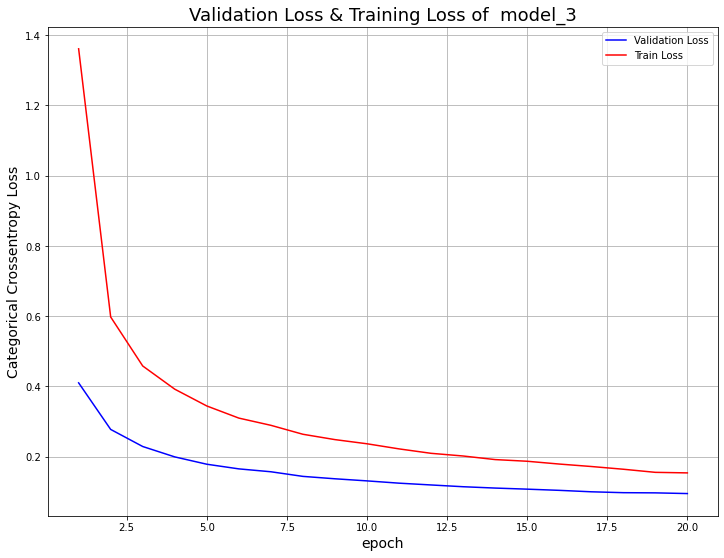

In [0]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax,'model_3')

## 5.4 Violin Plot of Model 3 Weights 

<Figure size 432x288 with 0 Axes>

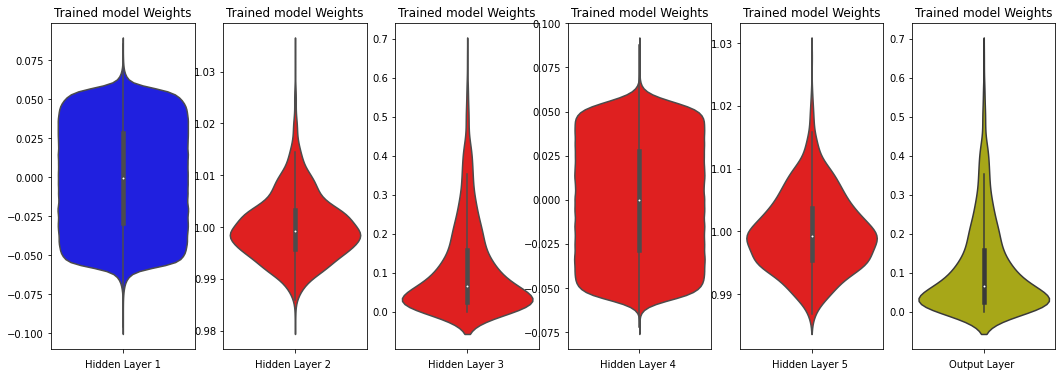

In [0]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.figure(figsize=(18,6))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 5.5 Confusion Matrix of Model_3

confusion Matrix= 
 [[ 967    0    0    1    0    2    5    1    4    0]
 [   0 1122    3    1    0    0    4    0    5    0]
 [   5    1  999    3    3    0    3    5   12    1]
 [   0    0    4  986    0    3    0    4   11    2]
 [   1    0    4    0  960    0    3    1    2   11]
 [   3    0    0    8    2  861    8    1    5    4]
 [   4    3    0    0    4    5  936    0    6    0]
 [   0    9   15    1    3    0    0  978    3   19]
 [   3    0    1    4    3    2    3    3  953    2]
 [   3    3    0    7   16    2    1    2   10  965]]


Text(114.0, 0.5, 'True Label')

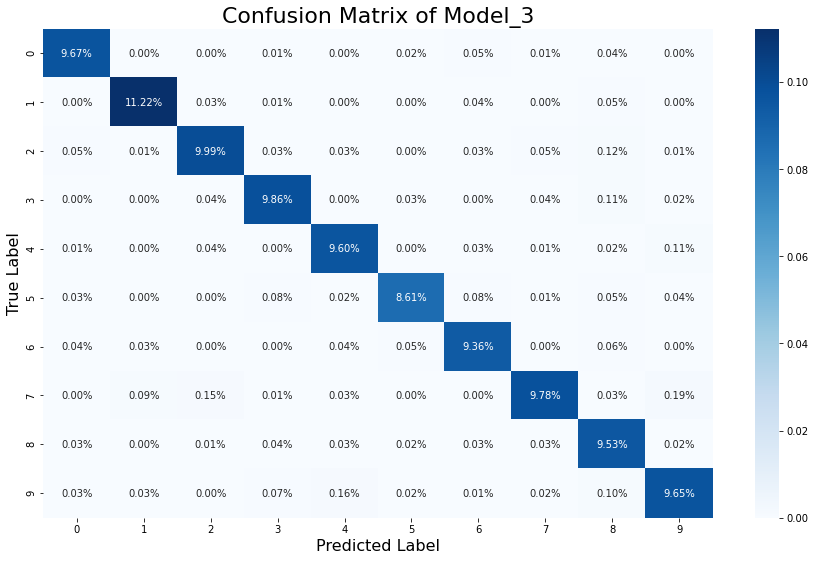

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

rounded_predictions = model_3.predict_classes(X_test, batch_size=128, verbose=0)
rounded_predictions[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
print("confusion Matrix= \n",cm)

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns

plt.figure(figsize=(15,9))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.title('Confusion Matrix of Model_3',fontsize=22)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Number of Hidden Layers", "No of MLP Neurons", "Test Accuracy"]

x.add_row(["Model_1", 2, '784-364-52-10', '96.85%'])
x.add_row(["Model_2", 3, '784-512-256-64-10 ', '97.69%'])
x.add_row(["Model_3", 5, '784-1024-864-512-256-128-10', '97.25%'])

print(x)


+---------+-------------------------+-----------------------------+---------------+
|  Model  | Number of Hidden Layers |      No of MLP Neurons      | Test Accuracy |
+---------+-------------------------+-----------------------------+---------------+
| Model_1 |            2            |        784-364-52-10        |     96.85%    |
| Model_2 |            3            |      784-512-256-64-10      |     97.69%    |
| Model_3 |            5            | 784-1024-864-512-256-128-10 |     97.25%    |
+---------+-------------------------+-----------------------------+---------------+
